In [2]:
import cv2
import numpy as np
from copy import copy
import matplotlib.pyplot as plt
import os
import natsort

In [5]:
def LR_classifier(direction):
    left = []
    right = []

    count = 0

    for i in direction:
        if i == 'l':
            left.append(road_picture[count])
        elif i == 'r':
            right.append(road_picture[count])
        count += 1
    
    return left, right

In [46]:
def color_filtering(ROI):
    hsv = cv2.cvtColor(ROI, cv2.COLOR_BGR2HSV)

    lower_blue = np.array([255, 0, 0])
    upper_blue = np.array([127, 127, 255])

    mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
    
    return mask_blue

In [7]:
def read_road_direction():
    Y = []
    r = open('../y_train.txt', mode='rt', encoding='utf-8')
    contents = r.readlines()
    for i in contents:
        Y.append(i[:1])
    return Y

In [8]:
def set_ROI(img):
    cuttingImg = img[250:][0:]
    return cuttingImg

In [9]:
def get_minmax_angle(dir):
    angle_list_max = []
    angle_list_min = []

    for i in dir:
        try:
            src = cv2.imread(i, cv2.IMREAD_COLOR)
            copyImg = src.copy()
            filteringImg = color_filtering(set_ROI(src))

            lines = cv2.HoughLinesP(filteringImg, 0.8, np.pi / 180, 90, minLineLength = 10, maxLineGap = 100)

            slope_degree = (np.arctan2(lines[:, 0, 1] - lines[:, 0, 3], lines[:, 0, 0] - lines[:, 0, 2]) * 180) / np.pi
            slope_degree = np.array(slope_degree)

            angle_list_max.append(slope_degree.max())
            angle_list_min.append(slope_degree.min())

        except TypeError:
            continue
        
    return angle_list_max, angle_list_min

In [32]:
def dir_discriminator(path):
    try:
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        filteredImg = color_filtering(set_ROI(img))
        lines = cv2.HoughLinesP(filteredImg, 0.8, np.pi / 180, 90, minLineLength = 10, maxLineGap = 100)
        slope_degree = (np.arctan2(lines[:, 0, 1] - lines[:, 0, 3], lines[:, 0, 0] - lines[:, 0, 2]) * 180) / np.pi
        
        avg_angle = np.average(np.array(slope_degree))
        print(avg_angle)
        
        if avg_angle > -160.2 and avg_angle < -100.0:
            return -1
        elif avg_angle > 100.4 and avg_angle < 170.1:
            return 1
                            
    except TypeError:
            return

In [35]:
pwd

'/Users/gangbacol/Desktop/Development/socket_RaspberryPi_Mac/training_dataset/road_drive_dataset/frames'

In [34]:
cd ../training_dataset/road_drive_dataset/frames

[Errno 2] No such file or directory: '../training_dataset/road_drive_dataset/frames'
/Users/gangbacol/Desktop/Development/socket_RaspberryPi_Mac/training_dataset/road_drive_dataset/frames


In [114]:
print(dir_discriminator('road_0500.jpg'))

None


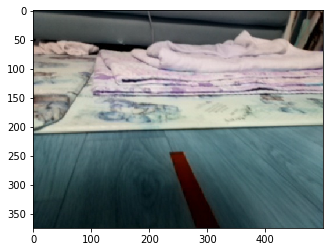

In [127]:
src = cv2.imread("road_0520.jpg", cv2.IMREAD_COLOR)
dst = src.copy()
plt.imshow(src)

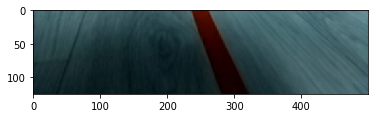

In [122]:
src = set_ROI(src)
plt.imshow(src)

In [96]:
src.shape

(125, 500, 3)

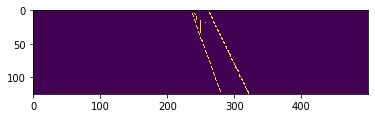

In [123]:
canny = cv2.Canny(src, 320, 1280, apertureSize = 5, L2gradient = True)

# cv2.imshow('asdf', canny)
# cv2.waitKey(0)
plt.imshow(canny)

In [129]:
lines = cv2.HoughLinesP(canny, 0.8, np.pi / 180, 90, minLineLength = 10, maxLineGap = 100)

for i in lines:
    cv2.line(dst, (i[0][0], i[0][1]), (i[0][2], i[0][3]), (0, 0, 255), 2)

cv2.imshow("dst", dst)
cv2.waitKey(0)

119

In [48]:
img1 = cv2.imread('road_0224.jpg', cv2.IMREAD_COLOR)
# img2 = cv2.imread('road_0052.jpg', cv2.IMREAD_COLOR)

In [43]:
print(img1[250:][0:])

[[[101 126 128]
  [102 127 129]
  [104 129 131]
  ...
  [117 152 165]
  [115 150 163]
  [114 149 162]]

 [[102 127 129]
  [103 128 130]
  [105 130 132]
  ...
  [119 154 167]
  [117 152 165]
  [116 151 164]]

 [[101 129 130]
  [102 130 131]
  [103 131 132]
  ...
  [119 155 165]
  [118 154 164]
  [118 154 164]]

 ...

 [[112 138 145]
  [112 138 145]
  [112 138 145]
  ...
  [116 152 160]
  [115 151 159]
  [114 150 158]]

 [[111 137 144]
  [111 137 144]
  [111 137 144]
  ...
  [115 151 159]
  [115 151 159]
  [114 150 158]]

 [[108 134 141]
  [108 134 141]
  [109 135 142]
  ...
  [115 151 159]
  [115 151 159]
  [115 151 159]]]


In [49]:
mask_blue1 = color_filtering(set_ROI(img1))
# mask_blue2 = color_filtering(set_ROI(img2))

In [50]:
cv2.imshow('test', mask_blue1)
cv2.waitKey(0)

3

In [272]:
# dst = src.copy()
lines1 = cv2.HoughLinesP(mask_blue1, 0.8, np.pi / 180, 90, minLineLength = 10, maxLineGap = 100)
# lines2 = cv2.HoughLinesP(mask_blue2, 0.8, np.pi / 180, 90, minLineLength = 10, maxLineGap = 100)

# lines[:, 0, 1] = lines[:, 0, 1] + 250
# lines[:, 0, 3] = lines[:, 0, 3] + 250

# for i in lines:
#     cv2.line(dst, (i[0][0], i[0][1]), (i[0][2], i[0][3]), (0, 0, 255), 2)

In [273]:
lines1

array([[[  0, 100, 100,   0]],

       [[  0, 107, 107,   0]],

       [[  0, 116,  92,  24]],

       [[  0,  91,  91,   0]],

       [[  0, 124,  73,  51]],

       [[  0, 114, 108,   2]],

       [[408,  41, 490, 123]],

       [[  0, 106, 102,   0]],

       [[  0, 111, 107,   1]],

       [[  0, 113, 109,   0]],

       [[  0,  98,  92,   0]],

       [[407,  33, 481, 107]],

       [[  0,  99,  96,   0]],

       [[422,  65, 481, 124]],

       [[  5, 124, 107,   3]],

       [[  0, 102, 105,   0]],

       [[ 10, 124, 106,   6]],

       [[  0, 101, 101,   0]],

       [[  3, 103, 106,   0]],

       [[  0,  96,  99,   0]],

       [[389,   2, 490, 122]],

       [[389,   3, 484, 124]],

       [[  0, 121,  88,  30]]], dtype=int32)

In [207]:
slope_degree1 = (np.arctan2(lines1[:, 0, 1] - lines1[:, 0, 3], lines1[:, 0, 0] - lines1[:, 0, 2]) * 180) / np.pi
slope_degree2 = (np.arctan2(lines2[:, 0, 1] - lines2[:, 0, 3], lines2[:, 0, 0] - lines2[:, 0, 2]) * 180) / np.pi

TypeError: 'NoneType' object is not subscriptable

In [157]:
print(np.average(np.array(slope_degree1)), np.average(np.array(slope_degree2)))

-143.6024892850966 140.42203231391792


array([135.        , 135.        , 135.        , 144.96380419,
       144.87405925, 144.9862604 , 143.13010235])

In [23]:
np.average(slope_degree)

-143.990144610975

In [17]:
for i in lines:
    cv2.line(dst, (i[0][0], i[0][1]), (i[0][2], i[0][3]), (0, 0, 255), 2)

In [18]:
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [71]:
os.chdir('frames') #frames 디렉토리로 이동
    road_picture = natsort.natsorted(os.listdir('./'))

IndentationError: unexpected indent (<ipython-input-71-5b6e195e1a9b>, line 2)

In [75]:
dir = read_road_direction()

In [78]:
(left, right) = LR_classifier(dir)

In [122]:
(left_angle_list_max, left_angle_list_min) = get_minmax_angle(left)
(right_angle_list_max, right_angle_list_min) = get_minmax_angle(right)

In [193]:
#  right_angle_list_max.index(180.0)
del right_angle_list_max[right_angle_list_max.index(180.0)]

ValueError: 180.0 is not in list

In [194]:
print('left max angle: '+str(np.array(left_angle_list_max).max())+', '+'left min angle: '+str(np.array(left_angle_list_min).min()),
         '\n'+'right max angle: '+str(np.array(right_angle_list_max).max())+', '+'right min angle: '+str(np.array(right_angle_list_min).min()))

left max angle: -103.80751901620131, left min angle: -172.2164404735346 
right max angle: 173.1731376615263, right min angle: 103.47315811273116


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()